# ChatGPT

[ChatGPT](https://openai.com/blog/chatgpt) is one of several sophisticated AI models built by [OpenAI](https://openai.com/), a San Francisco-based company whose mission is to "ensure that artificial general intelligence benefits all of humanity." ChatGPT is a Large Language Model (LLM) built on GPT-3.5, which boasts 175 billion parameters and ranks as the largest neural network ever built. ChatGPT can generate human-like prose by responding to instructions written in the [Chat Markup Language](https://learn.microsoft.com/en-us/azure/cognitive-services/openai/how-to/chatgpt), or ChatML for short. Here are few examples demonstrating how to leverage ChatGPT using its REST API.

![](Images/chatgpt.jpg)

Before running this notebook, create an environment variable named `API_KEY` and set it equal to your OpenAI API key. If you don't already have an OpenAI account and an API key to go with it, go to https://platform.openai.com/signup and create an account. Then go to the API Keys page, generate an API key, and save it where you can easily retrieve it later. OpenAI grants you a certain amount of free usage each month, so you don't have to create a paid account in order to get an API key. Once generated, an OpenAI API key can't be retrieved by returning to the OpenAI Web site. Be sure to save it in a secure place so you can retrieve it when needed. If you lose an API key, your only recourse is to generate a new one.

In [2]:
import os, openai

openai.api_key = os.environ['API_KEY']

Ask ChatGPT to write a paragraph of text describing molecular biology in the style of Dr. Seuss. Run this cell several times and you'll get a different result each time. Set `temperature` to 0.0, however, and the results will be the same most of the time:

In [3]:
messages = [{
    'role': 'user',
    'content': 'Describe molecular biology in the style of Dr. Seuss'
}]

response = openai.ChatCompletion.create(
    model='gpt-3.5-turbo',
    messages=messages
)

print(response.choices[0].message.content)

In the world of atoms and things so small,
There's a bit of science that's loved by all,
It's called molecular biology, you see,
And it's sure to brighten your day with glee!

It's all about the smallest of small,
The building blocks of life, one and all,
DNA, RNA, proteins and more,
Tiny things that we can't ignore!

They have names like adenine, guanine, cytosine and thymine,
And they bond together in a way that's just divine,
They make up the code of life we know,
A recipe for us to grow and grow!

And let's not forget the proteins so fine,
With shapes and structures just like a vine,
They do the work of the body, oh yes,
Enzymes, hormones, and much, much less!

So if you're curious about what's inside,
Or you just want to take a tiny ride,
Come explore the world of molecular biology,
It's a wondrous place, full of great ecology!


You can richen the UI experience by streaming the response. Here's how:

In [6]:
messages = [{
    'role': 'user',
    'content': 'Describe molecular biology in the style of Dr. Seuss'
}]

chunks = openai.ChatCompletion.create(
    model='gpt-3.5-turbo',
    messages=messages,
    stream=True
)

for chunk in chunks:
    content = chunk['choices'][0].get('delta', {}).get('content')
    if content is not None:
        print(content, end='')

Oh, let me tell you about molecular biology,
In the style of a Seuss-ian anthology.
It's the study of life at the smallest scale,
Where molecules self-organize and prevail!

At the heart of it all are nucleotides,
That create the genetic code that resides
In DNA, the blueprint of life,
That holds the instructions for each cell's strife.

From DNA, the message is sent
To RNA, to be read and bent
Into proteins, the workers of the cell,
That carry out all the functions that dwell.

The proteins they fold and twist,
To make enzymes that cannot be missed,
They break down the food we eat,
And make energy that cannot be beat.

Molecular biologists study the way
These molecules interact and sway,
To create the complex web of life,
That helps us thrive and banishes strife.

And that's just a taste of molecular form,
A scientific tale that's never been born,
But if you're interested, come along and see,
The wonderful world of molecular biology!

Messages transmitted to ChatGPT use the Chat Markup Language. ChatML exists so that ChatGPT can be given instructions and so that context can be preserved across calls. To demonstrate, ask ChatGPT what its name is:

In [7]:
messages = [{
    'role': 'user',
    'content': 'My name is Jeff. What\'s your name?' \
}]
 
response = openai.ChatCompletion.create(
    model='gpt-3.5-turbo',
    messages=messages
)
 
print(response.choices[0].message.content)

As an AI language model, I do not have a name. You may refer to me as Open AI. How may I assist you today?


But now try this:

In [8]:
messages = [
    {
        'role': 'system',
        'content': 'You are a friendly chatbot named Sam'
    },
    {
        'role': 'user',
        'content': 'My name is Jeff. What\'s your name?'
    }
]
 
response = openai.ChatCompletion.create(
    model='gpt-3.5-turbo',
    messages=messages
)
 
print(response.choices[0].message.content)

Hello Jeff, I'm Sam. How can I assist you today?


You can be as specific as you’d like with `system` messages, even saying "If you don’t know the answer to a question, say I don’t know." You can also prescribe a persona. Replace "friendly" with "sarcastic" in the message from system and run the code again. The response may be "Oh, hi Jeff, I’m Sam. You can call me whatever you'd like, but don’t call me late for dinner." Run the code several times and there’s no end to the colorful responses you’ll receive.

ChatML's greatest power lies in persisting context from one call to the next. As an example, try this:

In [10]:
messages = [
    {
        'role': 'system',
        'content': 'You are a friendly chatbot named Sam'
    },
    {
        'role': 'user',
        'content': 'My name is Jeff. What\'s your name?'
    }
]
 
response = openai.ChatCompletion.create(
    model='gpt-3.5-turbo',
    messages=messages
)
 
print(response.choices[0].message.content)

My name is Sam. Nice to meet you, Jeff! How can I assist you today?


Then follow up immediately with this:

In [11]:
messages = [
    {
        'role': 'system',
        'content': 'You are a friendly chatbot named Sam'
    },
    {
        'role': 'user',
        'content': 'What is my name?'
    }
]
 
response = openai.ChatCompletion.create(
    model='gpt-3.5-turbo',
    messages=messages
)
 
print(response.choices[0].message.content)

I'm sorry, I don't have access to that information. May I refer to you by a nickname?


ChatGPT will respond with something along the lines of "I'm sorry, but I don’t have access to that information." But now try this:

In [12]:
messages = [
    {
        'role': 'system',
        'content': 'You are a friendly chatbot named Sam'
    },
    {
        'role': 'user',
        'content': 'My name is Jeff. What\'s your name?'
    },
    {
        'role': 'assistant',
        'content': 'Hello Jeff, my name is Sam. Nice to meet you!'
    },
    {
        'role': 'user',
        'content': 'What is my name?'
    }
]
 
response = openai.ChatCompletion.create(
    model='gpt-3.5-turbo',
    messages=messages
)
 
print(response.choices[0].message.content)

Your name is Jeff.


Get it? Calls to ChatGPT are stateless. If you give ChatGPT your name in one call and ask it to repeat your name in the next call, ChatGPT has no clue. But with ChatML, you can provide past ChatGPT responses as context for the current call. You could easily build a conversational bot simply by repeating the last few prompts and responses in each call to ChatGPT. The further back you go, the longer the chatbot’s "memory" will be.

## Tokenization

ChatGPT doesn't work with words; it works with *tokens*. Tokenization plays an important role in Natural Language Processing. Neural networks can’t process text, at least not directly; they only process numbers. Tokenization converts words into numbers that a deep-learning model can understand. When ChatGPT generates a response by predicting a series of tokens, the tokenization process is reversed to convert the tokens into human-readable text.

ChatGPT uses a form of tokenization called [Byte-Pair Encoding](https://en.wikipedia.org/wiki/Byte_pair_encoding) (BPE), which was developed in the 1990s as a mechanism for compressing text. Today, it is widely used in the NLP space. Here’s how ChatGPT BPE-tokenizes the phrase "fourscore and seven years ago:"

![](Images/bpe.png)

As a rule of thumb, 3 words on average translate to about 4 BPE tokens. That’s important because ChatGPT limits the number of tokens in each API call. The maximum token count is controlled by a parameter named `max_tokens`. For ChatGPT, the default is 2,048 tokens or about 1,500 words, and the upper limit is 4,096. (GPT-4 expands the maximum token count to 32,768.) This limit applies to the combined length of the input and output in each API call. If the number of tokens exceeds `max_tokens`, then either the call will fail or the response will be truncated.

You can compute the number of tokens generated from a text sample with help from a Python package named [`tiktoken`](https://pypi.org/project/tiktoken/0.3.0/):

In [13]:
import tiktoken
 
text = 'Jeff loves to build and fly model jets. He built his first ' \
       'jet, a BVM BobCat, in 2007. After that, he built a BVM Bandit, ' \
       'a Skymaster F-16, and a Skymaster F-5. The latter two are 1/6th' \
       'scale models of actual fighter jets. Top speed is around 200 MPH.'
 
encoding = tiktoken.encoding_for_model('gpt-3.5-turbo')
num_tokens = len(encoding.encode(text))
print(f'{num_tokens} tokens')

78 tokens


You can estimate the token count for an entire `messages` array with the following code, which was adapted comments and all from the [ChatGPT documentation](https://platform.openai.com/docs/guides/chat/introduction):

In [14]:
num_tokens = 0
 
for message in messages:
    num_tokens += 4 # every message follows <im_start>{role/name}\n{content}<im_end>\n
    for key, value in message.items():
        num_tokens += len(encoding.encode(value))
        if key == 'name':  # if there's a name, the role is omitted
            num_tokens += -1 # role is always required and always 1 token
             
num_tokens += 2 # every reply is primed with <im_start>assistant
print(f'{num_tokens} tokens')

58 tokens


There are a couple of reasons to be aware of the token count in each call. First, you’re charged by the token for input and output. The price at the time of this writing was 0.2 cents per 1,000 tokens, which equates to 500,000 tokens – or roughly 375,000 words – per U.S. dollar. The larger the `messages` array and the longer the response, the more you pay. Second, when using the messages array to provide context from previous calls, you have a finite amount of space to work with. It's common practice to pick a number – say, 5 or 10 – and limit the context from previous calls to that number of messages, or to programmatically compute the number of tokens that a conversation comprises and include as many messages as `max_tokens` will allow while leaving room for the response.

## Working with text

ChatGPT can perform many NLP tasks such as sentiment analysis and neural machine translation (NMT) without further training. Here's an example that translates text from English to French. It's a good idea to set `temperature` to 0.0 here since you generally want translations to be accurate and repeatable rather than creative:

In [16]:
messages = [{
    'role': 'user',
    'content': f'Translate the following text from English to French: {text}'
}]

response = openai.ChatCompletion.create(
    model='gpt-3.5-turbo',
    messages=messages,
    temperature=0.0
)

print(response.choices[0].message.content)

Jeff adore construire et piloter des jets modèles réduits. Il a construit son premier jet, un BVM BobCat, en 2007. Après cela, il a construit un BVM Bandit, un Skymaster F-16 et un Skymaster F-5. Ces deux derniers sont des modèles à l'échelle 1/6 de véritables avions de chasse. La vitesse maximale est d'environ 200 MPH.


Perhaps surprisingly, it even understands Klingon. Let's see how the same paragraph translates to Klingon:

In [18]:
messages = [{
    'role': 'user',
    'content': f'Translate the following text from English to Klingon: {text}'
}]

response = openai.ChatCompletion.create(
    model='gpt-3.5-turbo',
    messages=messages,
    temperature=0.0
)

print(response.choices[0].message.content)

Jeff vIghro' 'ej vIghoS model jets. vIghro' BVM BobCat, 2007. DaH jImej, vIghoS BVM Bandit, Skymaster F-16, 'ej Skymaster F-5. cha'logh cha'logh 1/6th scale fighter jets. yIbuS 200 MPH.


One of the practical uses for ChatGPT is editing existing text to make it more compelling. Here's an example that generates a marketing blurb for a webinar on AI:

In [5]:
messages = [{
    'role': 'user',
    'content': 'Make the following marketing text more engaging: ' \
               'Learn how AI works and how it\'s used in business'
}]

response = openai.ChatCompletion.create(
    model='gpt-3.5-turbo',
    messages=messages,
    max_tokens=500
)

print(response.choices[0].message.content)

Are you curious to unravel the mysteries of AI and how it's changing the game for businesses around the globe? Discover the power of this groundbreaking technology and how it can help you gain a competitive advantage in the marketplace. From machine learning to predictive analytics, unlock the secrets of AI and make it work for you. Sign up now to start your journey into the exciting world of AI!


The following examples demonstrate how to use ChatGPT for sentiment analysis:

In [25]:
messages = [{
    'role': 'user',
    'content': 'Indicate whether the following review\'s sentiment is positive or ' \
               'negative: Great food and excellent service'
}]

response = openai.ChatCompletion.create(
    model='gpt-3.5-turbo',
    messages=messages
)

print(response.choices[0].message.content)

Positive


In [26]:
messages = [{
    'role': 'user',
    'content': 'Indicate whether the following review\'s sentiment is positive or ' \
               'negative: Long lines and poor customer service'
}]

response = openai.ChatCompletion.create(
    model='gpt-3.5-turbo',
    messages=messages
)

print(response.choices[0].message.content)

Negative


Sentiment analysis is a text-classification task. ChatGPT can classify text in other ways, too. The next two examples demonstrate how it could be used as the basis for a spam filter:

In [27]:
messages = [{
    'role': 'user',
    'content': 'Indicate whether the following email is spam or not spam: ' \
               'Please plan to attend the code review at 2:00 p.m. this afternoon'
}]

response = openai.ChatCompletion.create(
    model='gpt-3.5-turbo',
    messages=messages
)

print(response.choices[0].message.content)

Not spam.


In [28]:
messages = [{
    'role': 'user',
    'content': 'Indicate whether the following email is spam or not spam: ' \
               'Order prescription meds online and save $$$'
}]

response = openai.ChatCompletion.create(
    model='gpt-3.5-turbo',
    messages=messages
)

print(response.choices[0].message.content)

spam


ChatGPT was trained on a massive body of data that includes [Common Crawl](https://commoncrawl.org/), a pair of book databases known as Books1 and Books2, [WebText2](https://www.eleuther.ai/projects/owt2/), and [Wikipedia](https://www.wikipedia.org/), so it's knowledge is vast. It can generally answer questions as long as the answers are somewhere on the Internet. Its answers aren't always correct because (surprise!) there's a lot of misinformation on the Internet. Here's a question that's pertinent to this notebook:

In [10]:
messages = [{
    'role': 'user',
    'content': 'In which academic paper was the deep learning transformer ' \
               'introduced, and where can I find it?'
}]

response = openai.ChatCompletion.create(
    model='gpt-3.5-turbo',
    messages=messages
)

print(response.choices[0].message.content)

The deep learning transformer was introduced in the academic paper titled "Attention Is All You Need" by Vaswani et al. This paper was presented at the 31st Conference on Neural Information Processing Systems (NIPS 2017) and can be found on the official NIPS website or on arXiv.


ChatGPT can also answer questions from context that you provide. Here's an example that involves my hobby. Observe that ChatGPT seems to have the ability to count:

In [11]:
question = 'How many jets has Jeff built?'

context = 'Jeff loves to build and fly model jets. He built his first ' \
          'jet, a BVM BobCat, in 2007. After that, he built a BVM Bandit, ' \
          'a Skymaster F-16, and a Skymaster F-5. The latter two are 1/6th' \
          'scale models of actual fighter jets. Top speed is around 200 MPH.'

content = f'Answer the following question using the provided context, and if the ' \
          f'answer is not contained within the context, say "I don\'t know."\n\n' \
          f'Context: {context}\n\n' \
          f'Q: {question}\n\n' \
          f'A: '

messages = [{ 'role': 'user', 'content': content }]
    
response = openai.ChatCompletion.create(
    model='gpt-3.5-turbo',
    messages=messages
)

print(response.choices[0].message.content)

Jeff has built four jets.


tk

## Working with code

## Working with images

ChatGPT generates text, not images, but OpenAI's [DALL·E 2](https://openai.com/product/dall-e-2) model can generate images, create variations of existing images, edit images, and more. Here's an example. The following photo was taken in Iceland in 2022. It's a decent picture except for the chain fence in the background:

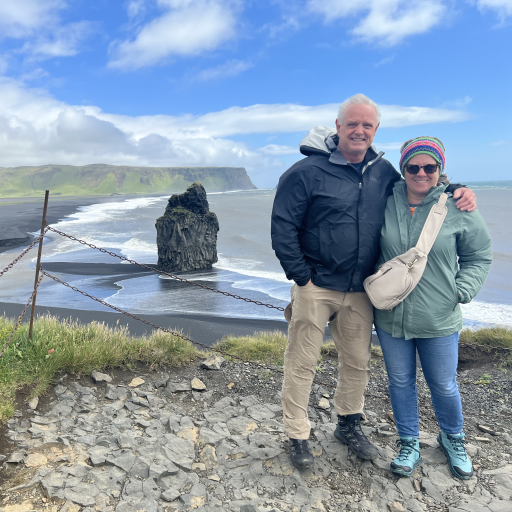

In [20]:
from PIL import Image

image = Image.open('Data/iceland.png')
display(image)

You can use a free paint tool to replace objects you want removed from the image with transparent pixels:

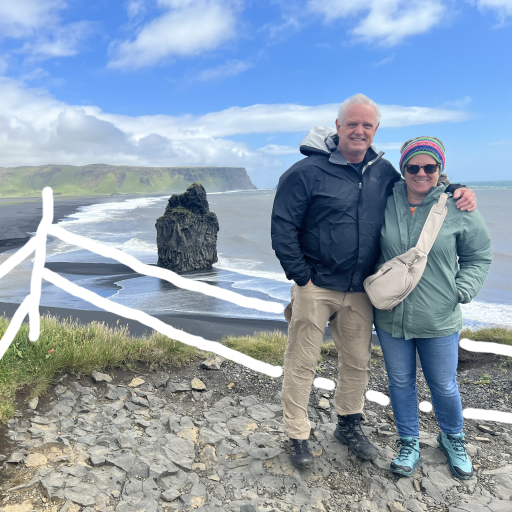

In [21]:
image = Image.open('Data/iceland-mask.png')
display(image)

Then you can use DALL·E 2's *inpainting* feature to fill in the missing pixels:

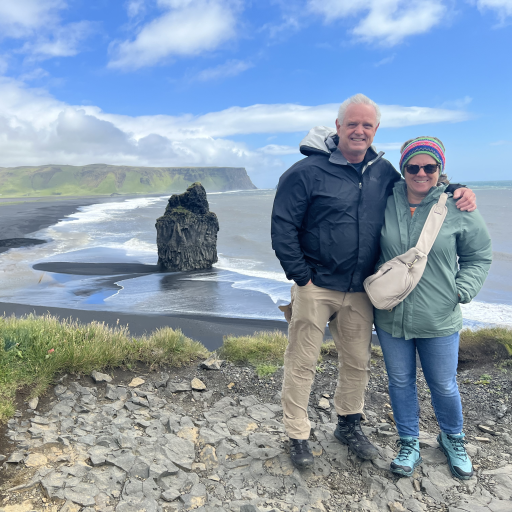

In [22]:
import base64
from io import BytesIO

response = openai.Image.create_edit(
    image=open('Data/iceland.png', 'rb'),
    mask=open('Data/iceland-mask.png', 'rb'),
    prompt='Two people on a cliff overlooking a beach',
    size='512x512',
    n=1,
    response_format='b64_json'
)

image_data = response['data'][0]['b64_json']
image = Image.open(BytesIO(base64.b64decode(image_data)))
display(image)

One of DALL·E 2's most remarkable talents is *outpainting*: extending an image to show how it might look on a larger canvas. Here is a rather famous painting:

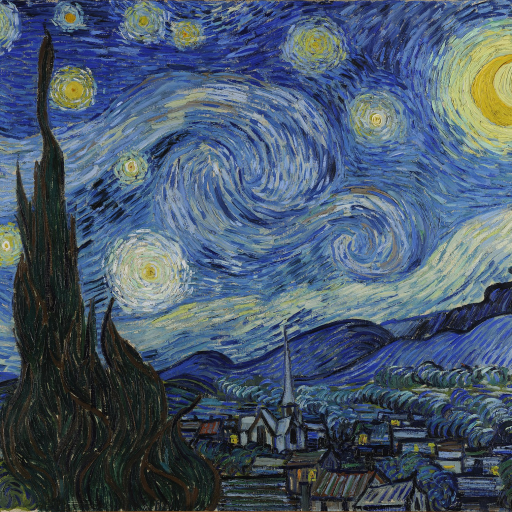

In [23]:
image = Image.open('Data/starry-night-512.png')
display(image)

Here's how DALL·E 2 imagines the painting might look had Van Gogh painted it on a larger canvas:

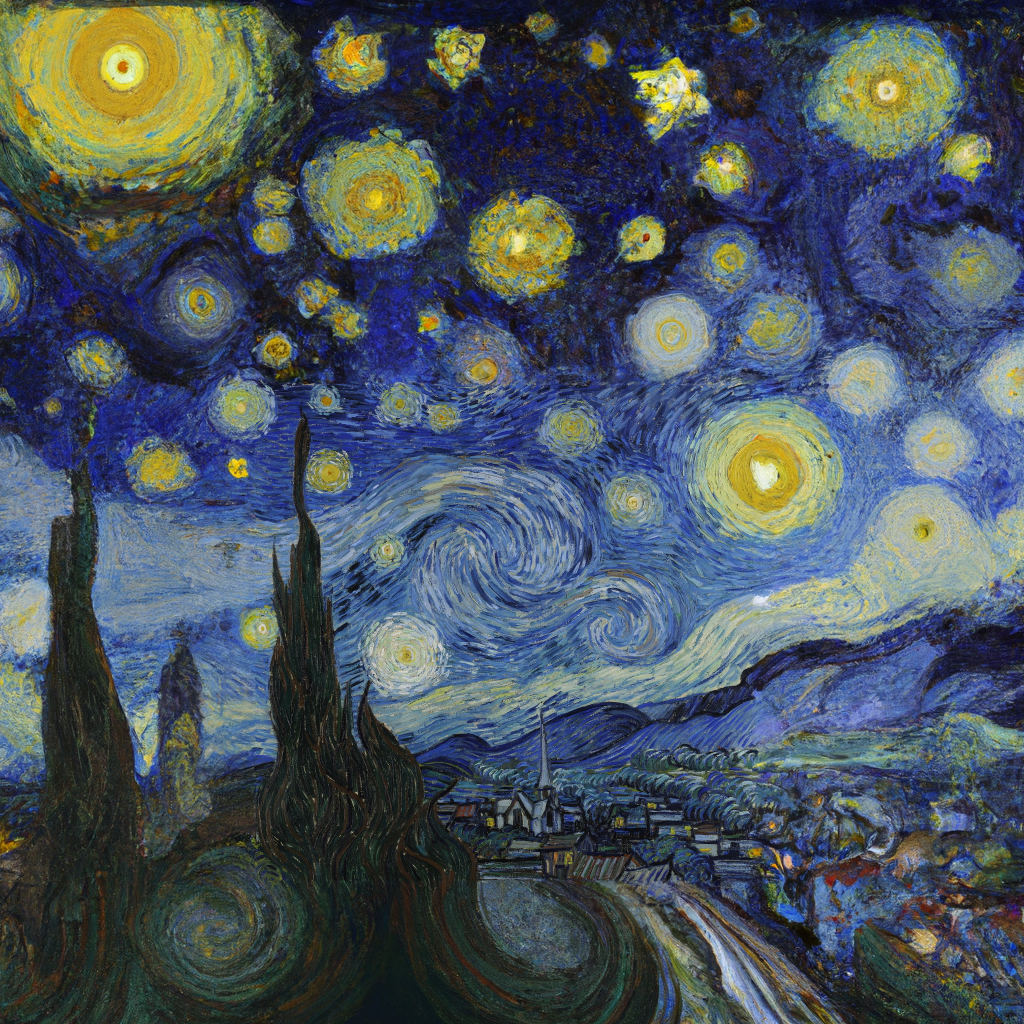

In [24]:
response = openai.Image.create_edit(
    image=open('Data/starry-night-mask-1024.png', 'rb'),
    mask=open('Data/starry-night-mask-1024.png', 'rb'),
    prompt='Painting of starry night in the style of van gogh',
    size='1024x1024',
    n=1,
    response_format='b64_json'
)

image_data = response['data'][0]['b64_json']
image = Image.open(BytesIO(base64.b64decode(image_data)))
display(image)

Now *that's* an imagination!